In [1]:
import pandas as pd

In [2]:
#Write a function parse_dataset(year) that helps you work with the data.
# The function should:

# accept a single year as input value
# construct a valid file path
# read in the corresponding names dataset
# define the correct column index for the data set
# output the dataset as a pandas dataframe

def parse_dataset(year):
    year = input(f'Please input year')
    df = pd.read_csv(f'../data/data/names/yob{year}.txt', names = ["name", "gender", "frequency"])
    return df
    
year = 1880


parse_dataset(1880)


Please input year 1880


,name,gender,frequency
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [3]:
# 1. Read in data:
df = pd.read_csv('../data/yob_1880.csv', index_col=0)

In [4]:
# 2. display the 'frequency' column
df["frequency"]

name
Mary         7065
Anna         2604
Emma         2003
Elizabeth    1939
Minnie       1746
             ... 
Woodie          5
Worthy          5
Wright          5
York            5
Zachariah       5
Name: frequency, Length: 2000, dtype: int64

In [5]:
# 4. display the data for row(s) containing William
df.loc["William"]


,gender,frequency
name,,
William,F,30
William,M,9532


In [6]:
# 5. display the data for all rows with William, Paul, and Anne

df.loc[["William", "Paul", "Anne"]]

,gender,frequency
name,,
William,F,30
William,M,9532
Paul,M,301
Anne,F,136


In [7]:
#6. display the 'frequency' column for William, Paul, and Anne
df.loc[["William", "Paul", "Anne"],["frequency"]]

,frequency
name,
William,30
William,9532
Paul,301
Anne,136


In [8]:
# 7. display the first three names and both columns

df.head(3)

,gender,frequency
name,,
Mary,F,7065
Anna,F,2604
Emma,F,2003


In [9]:
 #8. display the both columns for every second name
df.iloc[::2]

,gender,frequency
name,,
Mary,F,7065
Emma,F,2003
Minnie,F,1746
Ida,F,1472
Bertha,F,1320
...,...,...
Unknown,M,5
Wes,M,5
Wood,M,5


In [10]:
#Using your parse_dataset() function write a program that calculates the total number of babys for the year 1950 and prints the number to the screen. Make sure to select the correct column to sum.



def parse_dataset(year):
    #opening a text file and returning a dataframe for one year 
    #year = input(f'Please input year')
    df = pd.read_csv(f'../data/data/names/yob{year}.txt', names = ["name", "gender", "frequency"])
    return df

year = 1950

parse_dataset(1950)

,name,gender,frequency
0,Linda,F,80431
1,Mary,F,65481
2,Patricia,F,47944
3,Barbara,F,41554
4,Susan,F,38016
...,...,...,...
10300,Zachery,M,5
10301,Zackary,M,5
10302,Zannie,M,5
10303,Zeke,M,5


In [11]:
df_1950 = parse_dataset(1950)
total_babies_1950 = df_1950["frequency"].sum()
total_babies_1950

3503404

In [12]:
#What other interesting insights can you find about about a year using some of pandas methods?

In [13]:


df_1950['frequency'].sort_values()


10304        5
5832         5
5833         5
5834         5
5835         5
         ...  
1        65481
6112     79417
0        80431
6111     83554
6110     86227
Name: frequency, Length: 10305, dtype: int64

In [14]:
df_1950.count()

name         10305
gender       10305
frequency    10305
dtype: int64

In [15]:
df_1950.head()

,name,gender,frequency
0,Linda,F,80431
1,Mary,F,65481
2,Patricia,F,47944
3,Barbara,F,41554
4,Susan,F,38016


In [16]:
# Using the parse_dataset(year) custom function as a starting point, create code that loops over every year in the baby names data folder and combine the datasets into one dataset.


df = pd.DataFrame(columns = ['name', 'gender', 'frequency'])

for year in range(1880, 2021):
        df_temp = parse_dataset(year)
        df_temp['year']= year
    
        df = pd.concat([df, df_temp])

In [17]:
#Save the DataFrame in the data folder
df.to_csv('../data/all_years_baby_names.csv', index = False)

In [18]:
#Using the combined DataFrame and the method .sort_values() figure out which name had the all time highest frequency and in which year.
df.sort_values(by='frequency', ascending=False)

,name,gender,frequency,year
0,Linda,F,99693,1947.0
0,Linda,F,96215,1948.0
6104,James,M,94758,1947.0
7015,Michael,M,92785,1957.0
6105,Robert,M,91650,1947.0
...,...,...,...,...
8879,Kanisha,F,5,1971.0
8880,Karesa,F,5,1971.0
8881,Karisha,F,5,1971.0
8882,Karli,F,5,1971.0


In [19]:
# 2. Create a boolean mask for the name 'Martin'. It should just be a Series of True and False values.mask_martin = df['name'] == 'Martin'
mask_martin = df['name'] == 'Martin'
mask_martin

0        False
1        False
2        False
3        False
4        False
         ...  
31512    False
31513    False
31514    False
31515    False
31516    False
Name: name, Length: 2021558, dtype: bool

In [20]:
# 3. Use this boolean mask to filter your original DataFrame and display a DataFrame which only has babies names 'Martin'.

df_martin =df.loc[mask_martin] 
df_martin

,name,gender,frequency,year
986,Martin,M,357,1880.0
983,Martin,M,327,1881.0
1075,Martin,M,387,1882.0
1099,Martin,M,377,1883.0
1220,Martin,M,385,1884.0
...,...,...,...,...
19117,Martin,M,1396,2016.0
18705,Martin,M,1282,2017.0
18397,Martin,M,1295,2018.0
18277,Martin,M,1250,2019.0


In [21]:
# 4. How many entries are the in the 'Martin' DataFrame? 
num_entries_martin = len(df_martin)
num_entries_martin




241

In [22]:
# How many years are in the DataFrame? 


num_years_martin = df_martin['year'].nunique()
num_years_martin

141

In [23]:
#In how many years does the name 'Martin' appear for both genders?
years_both_genders = (df_martin.groupby('year')['gender'].nunique() == 2).sum()
years_both_genders

100

In [24]:
# 5. Filter the combined DataFrame for a DataFrame which only has names that have a frequency over 2000
df_over_2000 = df[df['frequency']>2000]
df_over_2000

,name,gender,frequency,year
0,Mary,F,7065,1880.0
1,Anna,F,2604,1880.0
2,Emma,F,2003,1880.0
942,John,M,9655,1880.0
943,William,M,9532,1880.0
...,...,...,...,...
17673,Atlas,M,2050,2020.0
17674,Messiah,M,2027,2020.0
17675,Tucker,M,2012,2020.0
17676,Barrett,M,2007,2020.0


In [25]:
# 6. Filter the combined DataFrame for a DataFrame which only has names that have a frequency over 2000 and for years starting with 2000. What is the most common name since 2000?
df_filtered = df[(df['frequency'] > 2000) & (df['year'] >=2000)]
df_filtered

,name,gender,frequency,year
0,Emily,F,25957,2000.0
1,Hannah,F,23085,2000.0
2,Madison,F,19968,2000.0
3,Ashley,F,17998,2000.0
4,Sarah,F,17712,2000.0
...,...,...,...,...
17673,Atlas,M,2050,2020.0
17674,Messiah,M,2027,2020.0
17675,Tucker,M,2012,2020.0
17676,Barrett,M,2007,2020.0


In [26]:
# 7. Filter the combined DataFrame for a DataFrame which only has names that have a frequency over 2000, for years starting with 2000 and for only females. What is the most common name given to females since 2000?
df_filtered_2 = df[(df['frequency'] > 2000) & (df['year'] >=2000) & (df['gender'] == 'F')]
df_filtered_2

,name,gender,frequency,year
0,Emily,F,25957,2000.0
1,Hannah,F,23085,2000.0
2,Madison,F,19968,2000.0
3,Ashley,F,17998,2000.0
4,Sarah,F,17712,2000.0
...,...,...,...,...
128,Ximena,F,2034,2020.0
129,Eden,F,2033,2020.0
130,Ayla,F,2023,2020.0
131,Kylie,F,2018,2020.0


In [27]:

# 8. What is the percentage of names that have a frequency larger than 100?


percentage_over_100 = (len(df[df['frequency'] > 100]) / len(df)) * 100
percentage_over_100

11.913336149643

In [28]:
#Filter the combined dataset for the name Emily
mask_Emily =df['name']== 'Emily'
df_Emily = df.loc[mask_Emily]
df_Emily

,name,gender,frequency,year
99,Emily,F,210,1880.0
89,Emily,F,244,1881.0
94,Emily,F,272,1882.0
80,Emily,F,342,1883.0
80,Emily,F,364,1884.0
...,...,...,...,...
25385,Emily,M,11,2018.0
11,Emily,F,8248,2019.0
27108,Emily,M,8,2019.0
17,Emily,F,6908,2020.0


In [29]:
#Filter that for only females
mask_Emily_F = df_Emily['gender'] == 'F'
df_Emily_F = df_Emily.loc[mask_Emily_F]
df_Emily_F

,name,gender,frequency,year
99,Emily,F,210,1880.0
89,Emily,F,244,1881.0
94,Emily,F,272,1882.0
80,Emily,F,342,1883.0
80,Emily,F,364,1884.0
...,...,...,...,...
8,Emily,F,10994,2016.0
11,Emily,F,9806,2017.0
11,Emily,F,8706,2018.0
11,Emily,F,8248,2019.0


In [30]:
#Save the DataFrame for later analysis
df_Emily_F.to_csv('../data/df_Emily_F.csv')

In [31]:
#Make a empty dictionary that maps the column names year and total_births to empty lists:

births_dict = {'year':[], 'total_births':[]}

# Loop over the years from 1880 to 2020
# Use your parse_dataset(year) function to parse each year
# Use the pandas.sum() method to calculate the sum of the frequencies (births)
# Append the result to the dictionary using births_dict['total_births'].append()
# Also append the year to births_dict['year']
# Create a yearly_births DataFrame by passing births_dictto pd.DataFrame()

for year in range(1880,2021):
    df_temp = parse_dataset(year)
    total_births = df_temp['frequency'].sum()
    births_dict['total_births'].append(total_births)
    births_dict['year'].append(year)
    yearly_births = pd.DataFrame(births_dict)

yearly_births



,year,total_births
0,1880,201484
1,1881,192690
2,1882,221533
3,1883,216945
4,1884,243461
...,...,...
136,2016,3665860
137,2017,3572758
138,2018,3511750
139,2019,3465821


<Figure size 1200x600 with 0 Axes>

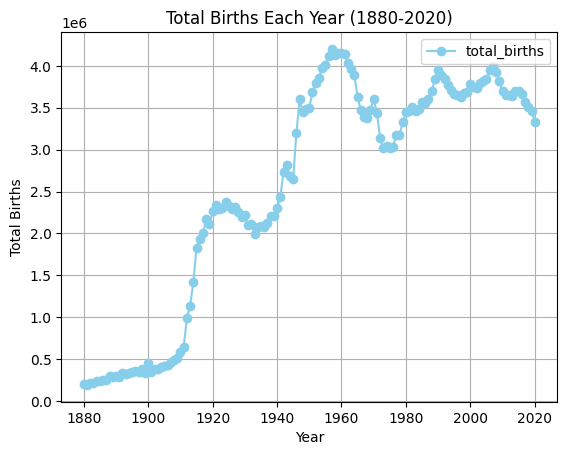

In [32]:

# use matplotlib to make a plot

from matplotlib import pyplot as plt
plt.figure(figsize=(12, 6))
yearly_births.plot(x='year', y='total_births', marker='o', linestyle='-', color='skyblue')
plt.title('Total Births Each Year (1880-2020)')
plt.xlabel('Year')
plt.ylabel('Total Births')
plt.grid(True)
plt.show()

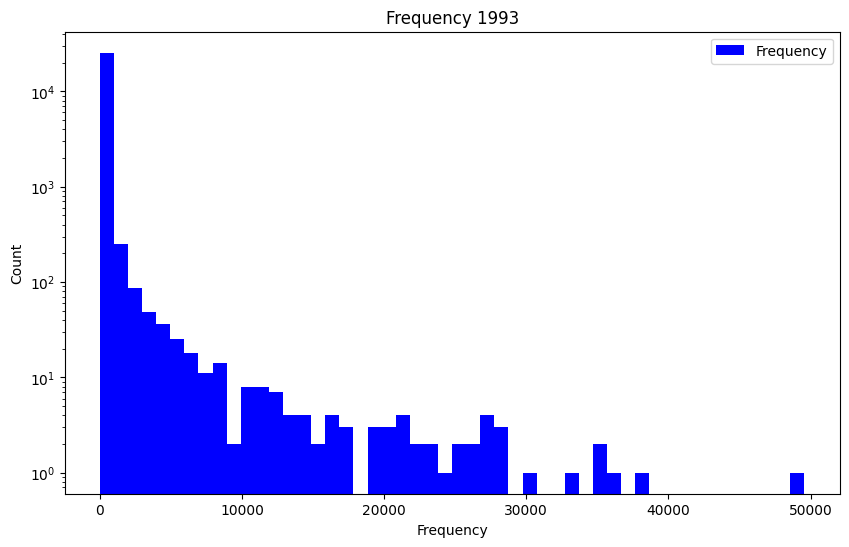

In [33]:
#Read in a single dataset for one year using the parse_dataset() function and create a histogram of the frequency column.

df_1993 = parse_dataset(1993)

plt.figure(figsize = (10,6))

plt.hist(df_1993['frequency'], log = True, bins = 50, label = 'Frequency', color = "blue")
plt.title('Frequency 1993')
plt.xlabel('Frequency')
plt.ylabel('Count')


plt.legend()
plt.show()


In [34]:
#How has the number of unique names given to newborn children varied over time?

def parse_dataset(year):
    #opening a text file and returning a dataframe for one year 
    #year = input(f'Please input year')
    df = pd.read_csv(f'../data/data/names/yob{year}.txt', names = ["name", "gender", "frequency"])
    return df


In [35]:
unique_names_dict = {'year':[], 'unique_names_count': []}

for year in range(1880, 2021):
    df_temp = parse_dataset(year)
    unique_names_count = df_temp['name'].nunique()
    unique_names_dict['year'].append(year)
    unique_names_dict['unique_names_count'].append(unique_names_count)

unique_names_df = pd.DataFrame(unique_names_dict)


In [36]:
unique_names_df.head()

,year,unique_names_count
0,1880,1889
1,1881,1829
2,1882,2012
3,1883,1962
4,1884,2158


Text(0, 0.5, 'Unique names count')

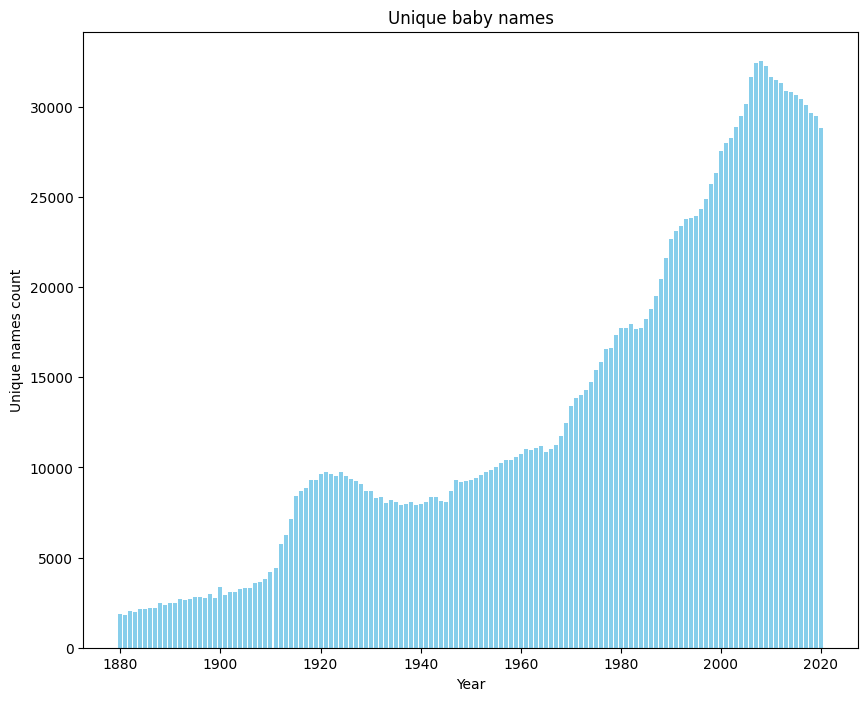

In [37]:
#Visualize the data, use the years on the x-axis and the counts on the y-axis.
plt.figure(figsize = (10,8))
plt.bar(unique_names_df['year'],unique_names_df['unique_names_count'], label= 'unique names', color ='skyblue')
plt.title('Unique baby names')
plt.xlabel('Year')
plt.ylabel('Unique names count')


In [38]:
##Using any of the single name over time dataframes created in Filtering DataFrames
Marina_filter = df['name']== "Marina"
df_Marina = df.loc[Marina_filter].copy()

df_Marina.head()

df_Marina['relative_frequency'] = df_Marina['frequency']/df_Marina['frequency'].sum()

Text(0, 0.5, 'Frequency')

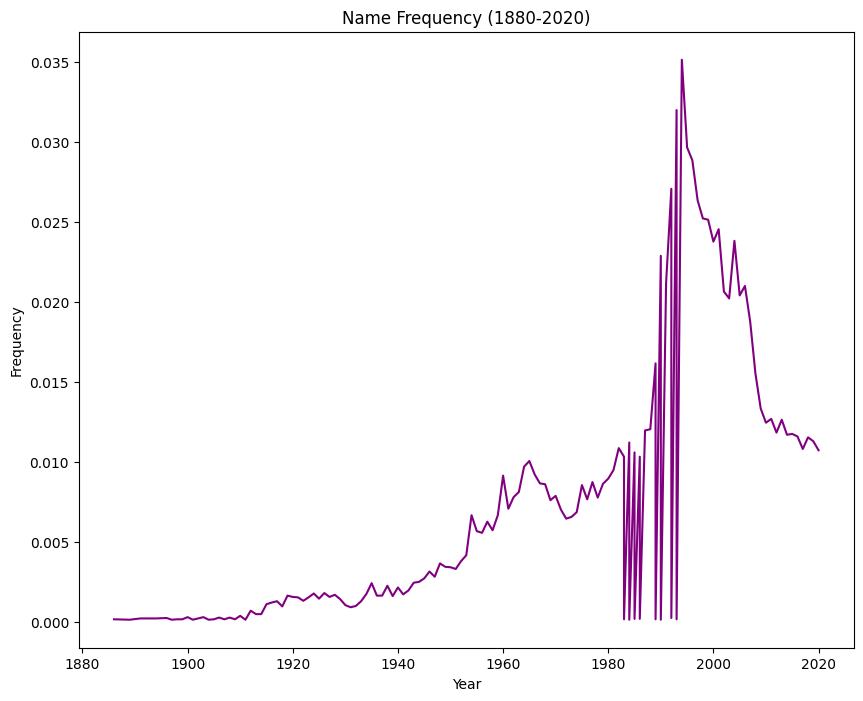

In [39]:
#Create a line plot with the years and the (relative) frequencies of a specific name

plt.figure(figsize = (10,8))
plt.plot(df_Marina['year'], df_Marina['relative_frequency'], label = 'Track Marina over time', color = "purple")
plt.title("Name Frequency (1880-2020)")
plt.xlabel('Year')
plt.ylabel('Frequency')

        

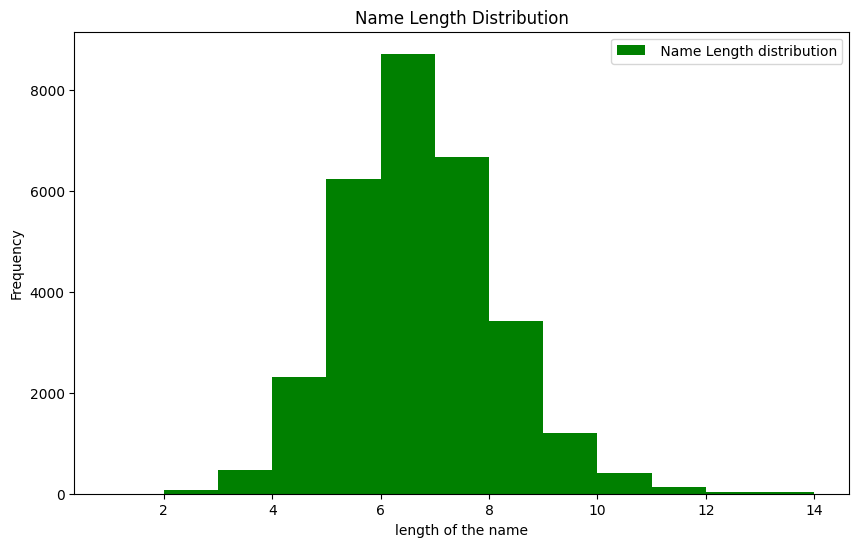

In [40]:
#Plot the distribution of the length of each name for a given year
df_2000 = parse_dataset(2000)
df_2000['name_length']=df_2000['name'].apply(len)
plt.figure(figsize = (10,6))
plt.hist(df_2000['name_length'], label=' Name Length distribution', bins=range(1, max(df_2000['name_length'])), color = 'green')
plt.title('Name Length Distribution')
plt.xlabel('length of the name')
plt.ylabel('Frequency')
plt.legend()

plt.show()

In [41]:
#Plot the average length of names over time!
average_lengths = []
for year in range(1880, 2021):
    df_year = parse_dataset(year)
    average_length = df_year['name'].apply(len).mean()
    average_lengths.append(average_length)


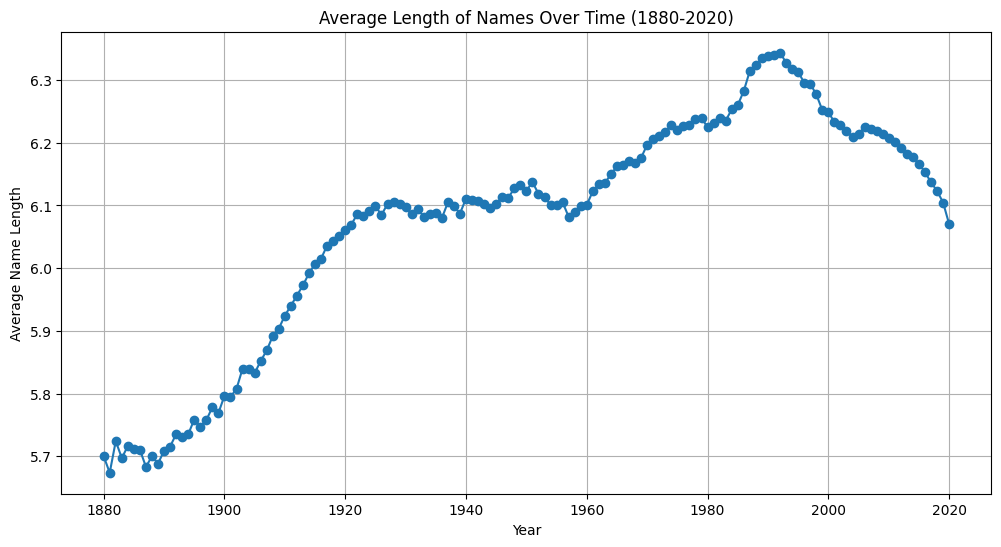

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(range(1880, 2021), average_lengths, marker='o')
plt.title('Average Length of Names Over Time (1880-2020)')
plt.xlabel('Year')
plt.ylabel('Average Name Length')
plt.grid(True)
plt.show()